**Загрузка и исследование данных**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

anket = pd.read_csv('Anket.csv', sep=';')
payments = pd.read_csv('Payments.csv',sep=';')
ml_data = pd.read_csv('ML.csv', sep=';')

In [2]:
data = pd.merge(anket, payments, on='DraftId')

In [3]:
data.columns

Index(['Unnamed: 0', 'DraftId', 'formula_id', 'flagFC', 'flagEF', 'flagCKB',
       'Amount', 'ActivityType', 'Education', 'Gender', 'LoanPurpose',
       'MaritalStatus', 'MonthlyIncome', 'Post', 'ApprovalCreateTime',
       'ApprovalAmount', 'RequestAmount', 'FormulaId', 'Answer', 'LoanAmount',
       'IssueDate', 'Duration', 'RetireDate', 'LoanStatus', 'RealRetireDate',
       'Balance', 'Payment', 'DayOfDelay', 'Amount00', 'Amount15', 'Amount30',
       'Amount45', 'Amount60', 'Amount90', 'Amount91'],
      dtype='object')

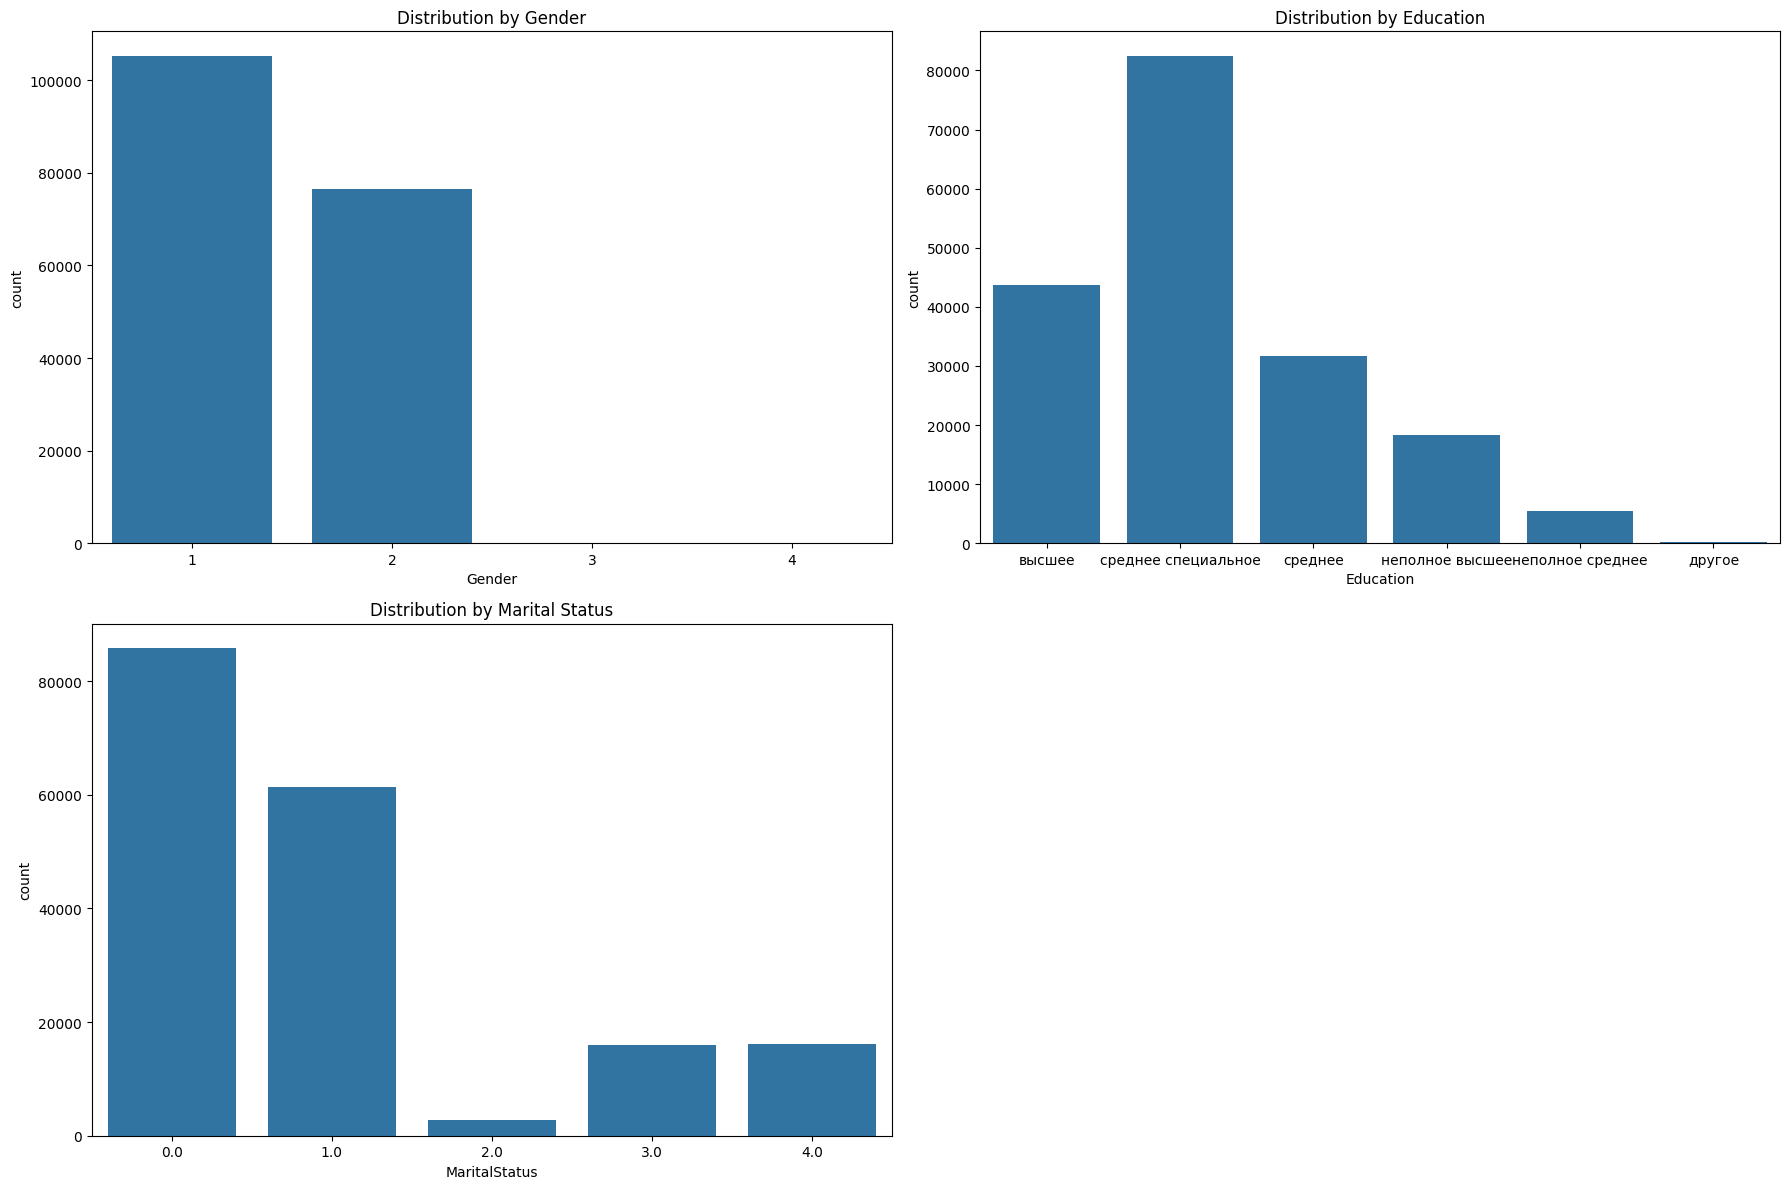

In [4]:
df = data
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Distribution by Gender')

plt.subplot(2, 2, 2)
sns.countplot(x='Education', data=df)
plt.title('Distribution by Education')

plt.subplot(2, 2, 3)
sns.countplot(x='MaritalStatus', data=df)
plt.title('Distribution by Marital Status')

plt.tight_layout()
plt.show()

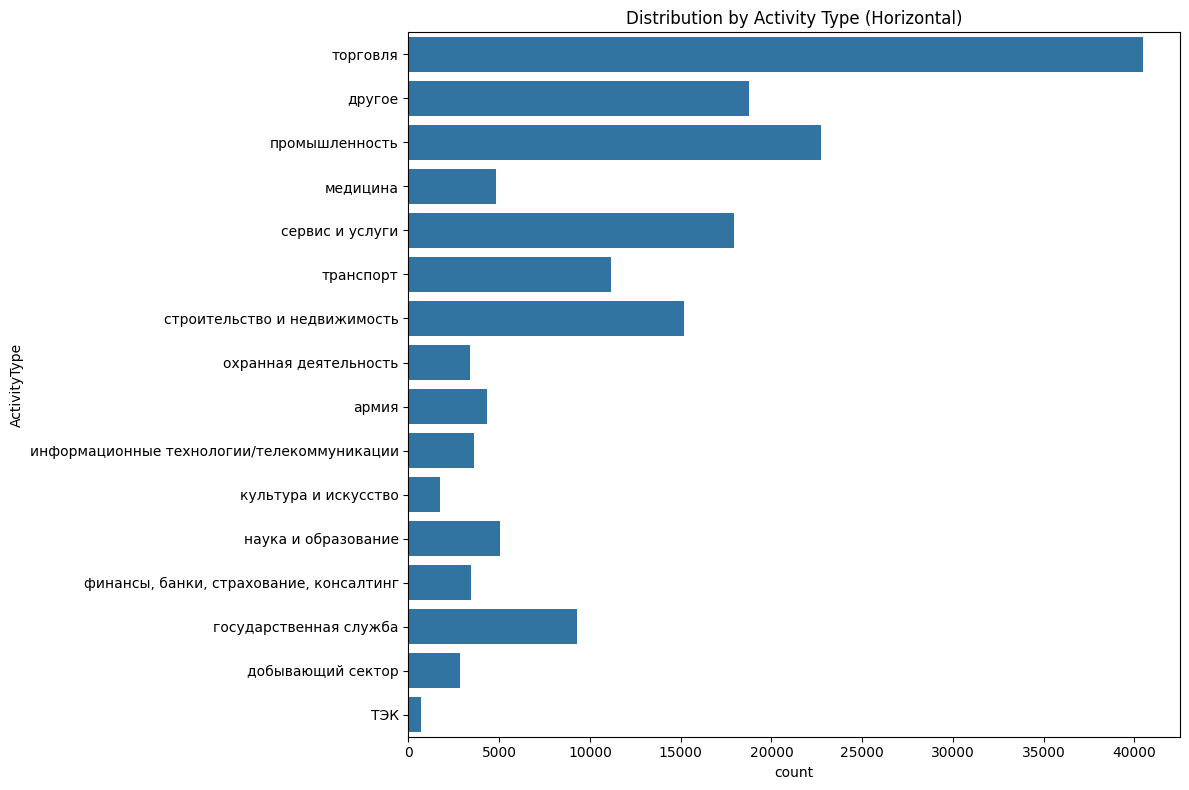

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(y='ActivityType', data=df)
plt.title('Distribution by Activity Type (Horizontal)')
plt.tight_layout()
plt.show()

In [6]:
data.head()

,Unnamed: 0,DraftId,formula_id,flagFC,flagEF,flagCKB,Amount,ActivityType,Education,Gender,...,Balance,Payment,DayOfDelay,Amount00,Amount15,Amount30,Amount45,Amount60,Amount90,Amount91
0,0,3ac9e896-80a7-4d07-af43-a3b775b30739,55,1,1,0,6000.0,торговля,высшее,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,f76f3e80-946e-46df-9db6-795d112e63b4,54,1,1,0,6000.0,NaN,среднее специальное,1,...,0.0,6480.0,0.0,6480.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7,187b4bf8-f41c-4a6d-8e27-dc39bc449b90,55,1,1,0,5000.0,другое,среднее специальное,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,6df8c019-7172-4733-bab1-51d2400e0ec5,55,1,1,0,6600.0,торговля,среднее,2,...,16320.1,179.9,361.0,NaN,NaN,NaN,NaN,NaN,NaN,179.9
4,23,d160dd00-075b-4e5a-a106-9704d3458261,55,1,1,0,6000.0,промышленность,среднее специальное,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,Unnamed: 0,formula_id,flagFC,flagEF,flagCKB,Amount,Gender,MaritalStatus,MonthlyIncome,ApprovalAmount,...,Balance,Payment,DayOfDelay,Amount00,Amount15,Amount30,Amount45,Amount60,Amount90,Amount91
count,182007.000000,182007.000000,182007.000000,182007.000000,182007.0,182007.000000,182007.000000,182007.000000,1.820070e+05,182007.000000,...,41419.000000,41419.000000,41419.000000,21454.000000,3942.000000,1444.000000,1000.000000,537.000000,524.000000,5610.000000
mean,253634.108424,54.324295,0.931025,0.987555,0.0,5336.948579,1.422061,0.984171,1.144920e+05,5336.948579,...,4361.111449,5600.238821,139.591033,6698.610418,7136.864069,7407.357756,7702.575240,8025.845400,8037.192328,6143.724071
std,146330.665241,1.678618,0.253413,0.110859,0.0,1499.026226,0.495711,1.277574,2.151548e+07,1499.026226,...,6917.009921,4177.018522,190.846117,1855.727111,2940.915841,3850.400088,4252.101614,5257.051219,5421.007132,6964.540932
min,0.000000,30.000000,0.000000,0.000000,0.0,2000.000000,1.000000,0.000000,0.000000e+00,2000.000000,...,0.000000,0.000000,0.000000,0.010000,0.010000,0.020000,0.050000,0.010000,0.010000,0.010000
25%,126938.000000,54.000000,1.000000,1.000000,0.0,4600.000000,1.000000,0.000000,2.800000e+04,4600.000000,...,0.000000,500.000000,0.000000,6180.000000,6321.250000,5056.047500,5147.250000,3510.000000,1887.500000,62.730000
50%,253383.000000,55.000000,1.000000,1.000000,0.0,6000.000000,1.000000,1.000000,3.700000e+04,6000.000000,...,0.000000,6666.000000,0.000000,6955.000000,7980.000000,8904.500000,9562.500000,9960.000000,10196.000000,2123.420000
75%,380746.500000,55.000000,1.000000,1.000000,0.0,6000.000000,2.000000,1.000000,5.000000e+04,6000.000000,...,11500.000000,7920.000000,366.000000,7740.000000,8712.000000,9834.000000,10692.000000,11682.000000,12742.500000,14036.605000
max,507246.000000,60.000000,1.000000,1.000000,0.0,30000.000000,4.000000,4.000000,8.000090e+09,30000.000000,...,75000.000000,75000.000000,516.000000,39300.000000,43200.000000,46200.000000,61000.000000,46853.120000,29471.850000,75000.000000


Стратификация обязательна.

In [8]:
data.isna().sum()

Unnamed: 0                 0
DraftId                    0
formula_id                 0
flagFC                     0
flagEF                     0
flagCKB                    0
Amount                     0
ActivityType           16509
Education                155
Gender                     0
LoanPurpose              155
MaritalStatus              0
MonthlyIncome              0
Post                   16358
ApprovalCreateTime         0
ApprovalAmount             0
RequestAmount              0
FormulaId                  0
Answer                     0
LoanAmount            140588
IssueDate             140588
Duration              140588
RetireDate            140588
LoanStatus            140588
RealRetireDate        153202
Balance               140588
Payment               140588
DayOfDelay            140588
Amount00              160553
Amount15              178065
Amount30              180563
Amount45              181007
Amount60              181470
Amount90              181483
Amount91      

Пропусков уйма. Пока не будем их убирать, но будем иметь ввиду.

**Task 2**

Найти по анкетным признакам сегмент клиентов, у которых дефолтность за весь период менее 25% (количество клиентов в сегменте должно быть больше 1000).

Дефолтность – показатель, который характеризует какой процент клиентов ничего не заплатил до определённого дня просрочки. Для выполнения задания исследуйте дефолтность на 30-ый день просрочки.

- LoanStatus – статус займа

- Amount15 – сумма, выплаченная клиентом между 0 и 15 днем просрочки

- Amount30 – сумма, выплаченная клиентом между 15 и 30 днем просрочки

In [9]:
data['Amount15'] = data['Amount15'].fillna(0)
data['Amount30'] = data['Amount30'].fillna(0)

data['is_default'] = (data['LoanStatus'] == 'Просрочен') & (data['Amount30'] == 0) & (data['Amount15'] == 0)

In [10]:
# Количество дефолтов
len(data[data['is_default'] == True])

12239

In [11]:
# Группировка данных по анкетным признакам и расчет дефолтности
grouped_data = data.groupby(['Gender', 'Education', 'MaritalStatus', 'ActivityType', 'LoanPurpose']).agg(
    count_clients=('DraftId', 'count'),
    default_rate=('is_default', 'mean')
).reset_index()

# Отбор сегмента с дефолтностью менее 25% и количеством клиентов более 1000
target_segment = grouped_data[(grouped_data['default_rate'] < 0.25) & (grouped_data['count_clients'] > 1000)]

In [12]:
target_segment

,Gender,Education,MaritalStatus,ActivityType,LoanPurpose,count_clients,default_rate
1986,1,среднее специальное,0.0,промышленность,непредвиденные расходы,1546,0.056921
2006,1,среднее специальное,0.0,строительство и недвижимость,непредвиденные расходы,1153,0.052038
2016,1,среднее специальное,0.0,торговля,непредвиденные расходы,1353,0.060606
2135,1,среднее специальное,1.0,промышленность,непредвиденные расходы,1069,0.064546
4507,2,среднее специальное,0.0,торговля,непредвиденные расходы,1305,0.088123
4655,2,среднее специальное,1.0,торговля,непредвиденные расходы,1582,0.099874


**Task 3**

In [13]:
# Фильтрация данных по сегменту
segment_data = data[
    (data['Gender'].isin(target_segment['Gender'])) &
    (data['Education'].isin(target_segment['Education'])) &
    (data['MaritalStatus'].isin(target_segment['MaritalStatus'])) &
    (data['ActivityType'].isin(target_segment['ActivityType'])) &
    (data['LoanPurpose'].isin(target_segment['LoanPurpose']))
]

In [14]:
segment_data.loc[:, 'RetireDate'] = pd.to_datetime(segment_data['RetireDate'])
segment_data.loc[:, 'RealRetireDate'] = pd.to_datetime(segment_data['RealRetireDate'])

filtered_data = segment_data.copy()

filtered_data['EffectiveRetireDate'] = filtered_data['RetireDate'].combine_first(filtered_data['RealRetireDate'])

filtered_data.loc[:, 'Week'] = filtered_data['EffectiveRetireDate'].apply(
    lambda x: x.to_period('W').start_time if pd.notna(x) else pd.NaT
)

In [15]:
filtered_data['is_not_default'] = ~filtered_data['is_default']
filtered_week_data = filtered_data.groupby('Week').agg({
    'Amount00': 'sum',
    'Amount15': 'sum',
    'Amount30': 'sum',
    'LoanAmount': 'sum',
    'is_default': 'sum',
    'is_not_default': 'sum'
}).reset_index()

In [16]:
filtered_week_data.loc[:, 'TotalPaid'] = filtered_week_data['Amount00'] + filtered_week_data['Amount15'] + filtered_week_data['Amount30']

In [17]:
filtered_week_data.loc[:, 'DefaultRate'] = (filtered_week_data['is_default'] / ((filtered_week_data['is_not_default'] + filtered_week_data['is_default'] )))

In [18]:
filtered_week_data.loc[:, 'Revenue'] = (filtered_week_data['TotalPaid'] / filtered_week_data['LoanAmount']).fillna(0)

In [19]:
filtered_week_data = filtered_week_data[['Week', 'DefaultRate', 'Revenue']]
filtered_week_data.to_excel('Default_and_Revenue_by_Week.xlsx', index=False)

In [20]:
# Не стоит смущаться тому, что в подгруппах средняя вероятность дефолта больше, чем в целом сегменте (см. взвешенное среднее).
print(np.mean(filtered_week_data['DefaultRate']))
print(np.mean(filtered_data['is_default']))

0.3368585414101093
0.0707070707070707


**Task 4**

In [21]:
df_ml = pd.merge(data, ml_data, on='DraftId')

In [22]:
# Удаление константных колонок
df_ml = df_ml.loc[:, df_ml.nunique() > 1]

In [23]:
categorical_cols = df_ml.select_dtypes(include=['object']).columns
len(categorical_cols)

11

In [24]:
# Если предполижить, что даная модель будет применяться сразу после выдачи займа, то необходимо тажке убрать данные из колонок Amount и RealRetireDate
df_ml = df_ml.drop(columns = ['DraftId', 'ApprovalCreateTime', 'LoanStatus', 'RealRetireDate', 'Amount00', 'Amount15', 'Amount30',
       'Amount45', 'Amount60', 'Amount90', 'Amount91'])

In [25]:
# Можно делать категории
categorical_cols = df_ml.select_dtypes(include=['object']).columns
df_ml = pd.get_dummies(df_ml, columns=categorical_cols)

In [26]:
df_ml.shape

(182007, 612)

600 колонок, уже многовато для RF. Можно было бы заняться feature selectiom, но сначала надо посмотреть, как справится бустинг

In [27]:
# Определение признаков и целевой переменной
X = df_ml.drop(['is_default'], axis=1)
y = df_ml['is_default']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# ! pip install catboost -q

In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

gini_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    y_train_series = pd.Series(y_train)
    y_test_series = pd.Series(y_test)
    
    # Подсчет количества вхождений каждого класса
    print(y_train_series.value_counts())
    print(y_test_series.value_counts())

    # Обучение модели CatBoost. Gini=2×AUC−1, поэтому можно обучать на встроенной AUC
    model = CatBoostClassifier(
        iterations=400,
        depth=7,
        learning_rate=0.1,
        eval_metric='AUC',
        random_state=42,
        cat_features=[],
        scale_pos_weight=100000  # Вес за дисбаланс классов
    )
    
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10, plot=False)
    
    # Оценка модели
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    gini_score = 2 * roc_auc_score(y_test, y_pred_prob) - 1
    gini_scores.append(gini_score)
    print(f'Gini Score for this fold: {gini_score}')

# Среднее значение Gini по всем фолдам
mean_gini_score = sum(gini_scores) / n_splits
print(f'Average Gini Score: {mean_gini_score}')


is_default
False    135814
True       9791
Name: count, dtype: int64
is_default
False    33954
True      2448
Name: count, dtype: int64
0:	test: 0.5693157	best: 0.5693157 (0)	total: 278ms	remaining: 1m 50s
10:	test: 0.9961996	best: 0.9961996 (10)	total: 1.48s	remaining: 52.4s
20:	test: 0.9989582	best: 0.9989950 (18)	total: 2.74s	remaining: 49.5s
30:	test: 0.9990111	best: 0.9990111 (30)	total: 3.83s	remaining: 45.6s
40:	test: 0.9990134	best: 0.9990138 (34)	total: 4.87s	remaining: 42.6s
50:	test: 0.9990134	best: 0.9990138 (34)	total: 5.88s	remaining: 40.2s
60:	test: 0.9990134	best: 0.9990138 (34)	total: 6.88s	remaining: 38.2s
70:	test: 0.9990260	best: 0.9990260 (68)	total: 7.88s	remaining: 36.5s
80:	test: 0.9990260	best: 0.9990260 (74)	total: 8.89s	remaining: 35s
90:	test: 0.9990260	best: 0.9990260 (74)	total: 9.9s	remaining: 33.6s
100:	test: 0.9990260	best: 0.9990260 (74)	total: 10.9s	remaining: 32.3s
110:	test: 0.9990261	best: 0.9990261 (104)	total: 12.1s	remaining: 31.4s
120:	test: 0.

In [30]:
feature_importances = model.get_feature_importance()
feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Отображение важности признаков
importances_df.head(20)

,Feature,Importance
12,Duration,12.288462
55,cred_max_overdue_active_ilcc_all_min,4.888526
157,v6__12last_all_micro_1y_mean,3.520939
16,cntcardusersall_mean,3.095226
149,v0__all_micro_1y_max,2.982652
113,delay5_all_ilcc_all_sum,2.611663
25,firstTransferFromMFODateall_sum,2.471796
141,v0__1first_all_all_1m_mean,2.460251
95,cred_type_3,2.400246
92,cred_sum_overdue_all_micro_all_mean,2.130858


Отсюда понимаем, что модель действительно обучалась, а не брала наиболее частый класс.

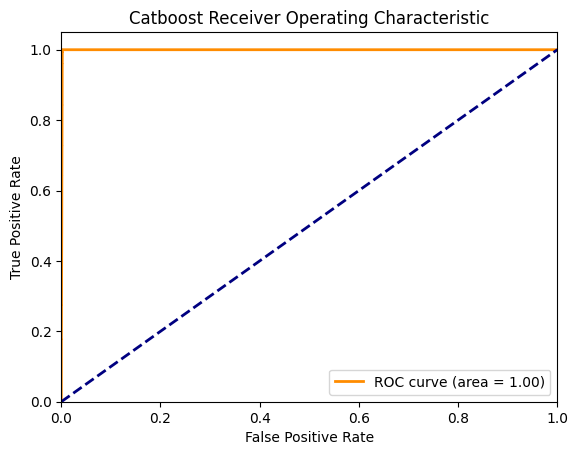

In [31]:
# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Catboost Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Данная кривая близка к идеальной по причине того, что события дефолта встречаются слишком редко относительно всех событий. Смысла делать отдельный feature selection на таком маленьком наборе и таких матриках не вижу, поскольку Gini не делает акцент на Recall.